# Codigo del gradiente de una imagen
Leonardo Coronado Arvayo

In [43]:
import numpy as np
n=5
sobelx=np.zeros(shape=(n,n))
sobely=np.zeros(shape=(n,n))
for u in range(0,n):
    for v in range(0,n):
        dx=(int(n/2)-u)
        dy=(int(n/2)-v)
        if (abs(dx)+abs(dy)) == 0:
            sobelx[u,v]==0
            sobely[u,v]==0
        elif u<int(n/2):
            sobelx[u,v]=abs(dx)/(abs(dx)+abs(dy))
            sobely[u,v]=abs(dy)/(abs(dx)+abs(dy))
        else:
            sobelx[u,v]=-abs(dx)/(abs(dx)+abs(dy))
            sobely[u,v]=-abs(dy)/(abs(dx)+abs(dy))

In [228]:
import numpy as np
#se pide el tamaño de la matriz
n=5
#se define una matriz de zeros de nxn
a=np.zeros(shape=(n,n))
ax=np.zeros(shape=(n,n))
ay=np.zeros(shape=(n,n))
der=np.zeros(shape=(n,n))
lapx=np.zeros(shape=(n,n))
derx=np.zeros(shape=(n,n))
dery=np.zeros(shape=(n,n))

#se define sigma (dev estandar)
sigx=1
sigy=1

for u in range(0,n):
    for v in range(0,n):
        dx=(int(n/2)-u)
        dy=(int(n/2)-v)
        a[u,v]=np.exp( - ( ( (dx**2)/(2*(sigx**2)) )+( (dy**2)/(2*(sigy**2)) ) ) )
        #a[u,v]=np.exp( - ( ( (dx**2+ dy**2)/(2*np.pi*(sigy**2)) ) ) )
        ax[u,v]= (2*dx/(sigx**2))*a[u,v]
        ay[u,v]= (2*dy/(sigy**2))*a[u,v]
        #derx[u,v]= (2*dx/(np.pi*sigx**2))*a[u,v]*sobelx[u,v]
        #dery[u,v]= (2*dy/(np.pi*sigy**2))*a[u,v]*sobely[u,v]
       # lapx[u,v]=((dx-sigx**2)/(sigx**4))*a[u,v]
        #lapy[u,v]=((dy-sigy**2)/(sigy**4))*a[u,v]
total=np.sum(a)
a=a/total
ax=ax/total
ay=ay/total


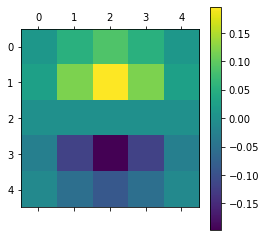

In [71]:
ax
import numpy as np
import matplotlib.pyplot as plt

plt.matshow(ax);
plt.colorbar()
plt.show()

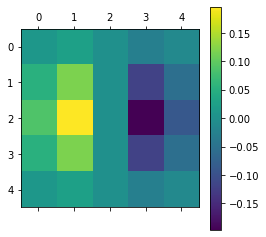

In [72]:
ay
import numpy as np
import matplotlib.pyplot as plt

plt.matshow(ay);
plt.colorbar()
plt.show()

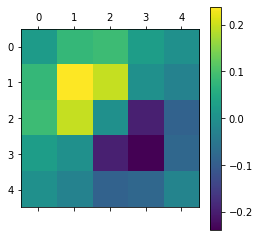

In [73]:
ax+ay
plt.matshow(ax+ay);
plt.colorbar()
plt.show()

In [2]:
import cv2
import skimage as sk
from skimage import data, io, filters
import warnings
from IPython.display import Image
warnings.filterwarnings("ignore")
img = cv2.imread('lena.jpg',0)
# img=sk.io.imread('lena.jpg')

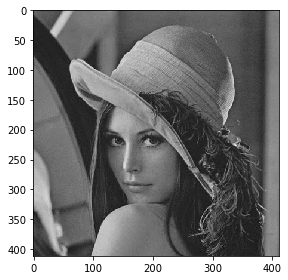

In [3]:
sk.io.imshow(img)

# Derivada con respecto a x

In [264]:
L=img.shape
x=L[0]
y=L[1]
gx=np.zeros(shape=(x,y))
for j in range(0,x):
    for i in range(0,y):
        for u in range(0,n):
            for v in range(0,n):
                d1=(int(n/2)-u)
                d2=(int(n/2)-v)
                if (d1+j)>=0 and (d2+i)>=0 and (d1+j)<x and (d2+i)<y:
                    gx[j,i]=gx[j,i]+ax[d1,d2]*img[d1+j,d2+i]
maxe=np.amax(gx)
mine=np.amin(gx)
for j in range(0,x):
    for i in range(0,y):
        gx[j,i]=( (gx[j,i]-mine)*(1/(maxe-mine)) )

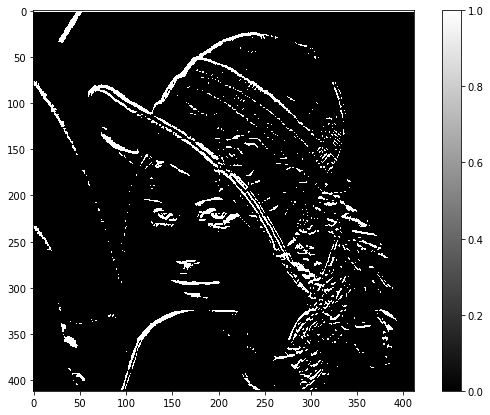

In [230]:
gx1=np.zeros(shape=(x,y))
for j in range(0,x):
    for i in range(0,y):
        if gx[j,i] > 1.1*np.mean(gx):
            gx1[j,i]=1
        else:
            gx1[j,i]=0
plt.figure(1, figsize=(10,7))
fig = plt.imshow(gx1)
fig.set_cmap('gray')
plt.colorbar()
plt.show()

# derivada con respecto a y  

In [265]:
L=img.shape
x=L[0]
y=L[1]
gy=np.zeros(shape=(x,y))
for j in range(0,x):
    for i in range(0,y):
        for u in range(0,n):
            for v in range(0,n):
                d1=(int(n/2)-u)
                d2=(int(n/2)-v)
                if (d1+j)>=0 and (d2+i)>=0 and (d1+j)<x and (d2+i)<y:
                    gy[j,i]=gy[j,i]+ay[d1,d2]*img[d1+j,d2+i]
maxe=np.amax(gy)
mine=np.amin(gy)
for j in range(0,x):
    for i in range(0,y):
        gy[j,i]=( (gy[j,i]-mine)*(1/(maxe-mine)) )

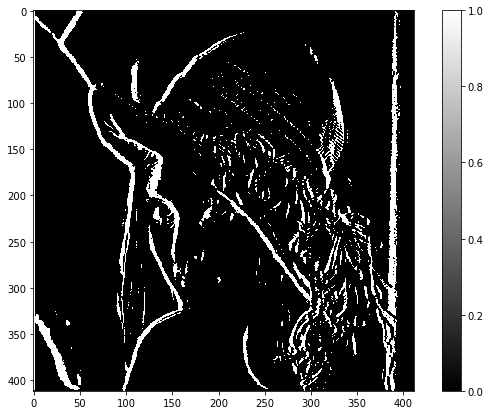

In [229]:
gy1=np.zeros(shape=(x,y))
for j in range(0,x):
    for i in range(0,y):
        if gy[j,i] > 1.1*np.mean(gy):
            gy1[j,i]=1
        else:
            gy1[j,i]=0
plt.figure(1, figsize=(10,7))
fig = plt.imshow(gy1)
fig.set_cmap('gray')
plt.colorbar()
plt.show()

# laplaciano de la imagen

In [752]:
#ventana 
vtam=3
ven=np.zeros(shape=(vtam,vtam))
sigx=2
sigy=2
for u in range(0,vtam):
    for v in range(0,vtam):
        dx=(int(vtam/2)-u)
        dy=(int(vtam/2)-v)
        ven[u,v]=np.exp( - ( ( (dx**2)/(2*(sigx**2)) )+( (dy**2)/(2*(sigy**2)) ) ) )
tv=np.sum(ven)
ven=ven/tv


In [753]:
L=img.shape
x=L[0]
y=L[1]                  
listR=[]
I2x=np.zeros(shape=(x,y))
I2y=np.zeros(shape=(x,y))
Ixy=np.zeros(shape=(x,y))

for j in range(0,x):
    for i in range(0,y):
        I2y[j,i] =gy1[j,i]*gy1[j,i]
        Ixy[j,i]=gx1[j,i]*gy1[j,i]
        I2x[j,i] =gx1[j,i]*gx1[j,i]

In [758]:
m=np.zeros(shape=(2,2))
listR=[]
ventana=np.zeros(shape=(3,3))
for j in range(0,x):
    for i in range(0,y):
        mx=0
        my=0
        mxy=0
        for u in range(0,vtam):
            for v in range(0,vtam):
                d1=(int(vtam/2)-u)
                d2=(int(vtam/2)-v)
                if (d1+j)>=0 and (d2+i)>=0 and (d1+j)<x and (d2+i)<y:
                    mx=mx+ven[d1,d2]*I2x[d1+j,d2+i]
                    my=mx+ven[d1,d2]*I2y[d1+j,d2+i] 
                    mxy=mxy+ven[d1,d2]*Ixy[d1+j,d2+i]
                    #ventana[d1,d2]=(I2x[d1+j,d2+i]**2+I2y[d1+j,d2+i]**2+(2*Ixy[d1+j,d2+i])**2)**(0.5)
                    ventana[d1,d2]=(gx[d1+j,d2+i]**2+gy[d1+j,d2+i]**2)**(0.5)

        m[0,0]=mx
        m[0,1]=mxy
        m[1,0]=mxy
        m[1,1]=my
        deter=np.linalg.det(m)
        trace=np.trace(m)
        R=deter-0.04*(trace**2)
        listR.append(R)
        if R>(0.5) and ventana[d1,d2]==np.amin(ventana):
            corner[d1+j,d2+i]=1
        else:
            corner[j,i]=0


In [759]:
print(np.std(listR),np.amax(listR), np.mean(listR),np.amin(listR))

0.09291493940679627 0.9147769874620605 0.021719524367688925 -0.1290625557934411


In [760]:
print(np.std(corner),np.amax(corner), np.mean(corner))

0.04908734918745122 1.0 0.0024154020171552456


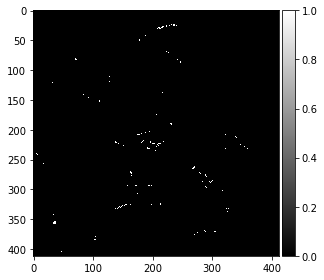

In [761]:
sk.io.imshow(corner, cmap="gray")

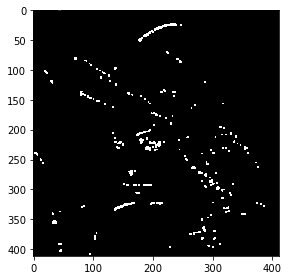

In [751]:
corner = cv2.dilate(corner,None)
sk.io.imshow(corner, cmap="gray")

In [727]:
dst = cv2.cornerHarris(img,3,5,0.04)


In [241]:
dst = cv2.dilate(dst,None)


In [242]:
ret, dst = cv2.threshold(dst,0.01*dst.max(),255,0)
dst = np.uint8(dst)

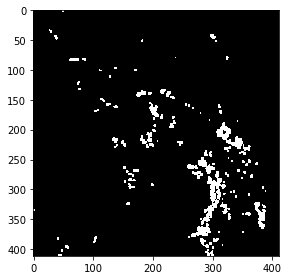

In [243]:
sk.io.imshow(dst, cmap="gray")

In [208]:
print(np.mean(dst),np.amin(dst),np.amax(dst))

-0.00081041 -0.2537788 0.29035288
